# Hàm kích hoạt là gì ?

Là các hàm phi tuyến được sử dụng để tạo sự phi tuyến cho mô hình
* **Input**: $x$
* **Output**: $f(x)$ với $f$ là một hàm phi tuyến

# Tại sao lại sử dụng Activation Function (Hàm kích họat) trong các mô hình mạng Neural Network ?

<img src='https://images.viblo.asia/full/2c7581eb-d7fb-4f77-8def-a2ddfef4060e.png'/>
</br> Do các điểm dữ liệu không phải lúc nào cũng ổn định và phân bố phức tạp nên việc sử dụng các đường thẳng hoặc siêu phẳng (hyperplane) rất khó để biểu diễn các điểm dữ liệu. </br>
</br>Hơn nữa, việc sử dụng các đưởng thẳng có thể dẫn tới một đầu ra rất lớn (overflow) và mô hình có thể không học được gì nên cần phải có giải pháp để chặn khoảng các giá trị đó mà không làm mất đi ý nghĩa của dữ liệu. Do đó mà ta có activation function.</br>

[Link đọc thêm](https://viblo.asia/p/tai-sao-lai-su-dung-activation-function-trong-neural-network-MG24BwweJz3)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch

# Activation function

In [ ]:
def function_plot(data, function, function_derivative, function_name):
  fig = plt.figure(figsize=(10, 10))
  ax = fig.add_subplot(1, 1, 1)
  plt.title(function_name)
  plt.xlabel('x')
  plt.grid()
  ax.spines['left'].set_position(('data', 0.0))
  ax.spines['bottom'].set_position(('data', 0.0))
  ax.spines['top'].set_color('none')
  ax.spines['right'].set_color('none')
  plt.plot(data, function, color='red')
  plt.plot(data, function_derivative, color='green')
  plt.show()

## Sigmoid

- $sigmoid(x) = \frac{1}{1 + e^{-x}}$
- $sigmoid'(x) = sigmoid(x)*(1-sigmoid(x))$


In [ ]:
def sigmoid(data):
  return 1 / (1 + np.exp(-data))

In [ ]:
def sigmoid_derivative(data):
  return sigmoid(data) * (1 - sigmoid(data))

In [ ]:
data = np.linspace(-20, 20, 100)
data_sigmoid = sigmoid(data)
print(data_sigmoid)

[2.06115362e-09 3.08732876e-09 4.62440004e-09 6.92672447e-09
 1.03752944e-08 1.55407847e-08 2.32779890e-08 3.48672722e-08
 5.22264472e-08 7.82281373e-08 1.17175143e-07 1.75512472e-07
 2.62893872e-07 3.93779338e-07 5.89827961e-07 8.83482085e-07
 1.32333584e-06 1.98217642e-06 2.96902870e-06 4.44719601e-06
 6.66128213e-06 9.97766470e-06 1.49451152e-05 2.23855904e-05
 3.35302067e-05 5.02228667e-05 7.52251664e-05 1.12672884e-04
 1.68759242e-04 2.52757236e-04 3.78548446e-04 5.66907423e-04
 8.48910885e-04 1.27101626e-03 1.90260614e-03 2.84714919e-03
 4.25860705e-03 6.36532037e-03 9.50426753e-03 1.41690589e-02
 2.10746635e-02 3.12392175e-02 4.60755062e-02 6.74672091e-02
 9.77725999e-02 1.39652183e-01 1.95581668e-01 2.66960083e-01
 3.52958350e-01 4.49666020e-01 5.50333980e-01 6.47041650e-01
 7.33039917e-01 8.04418332e-01 8.60347817e-01 9.02227400e-01
 9.32532791e-01 9.53924494e-01 9.68760783e-01 9.78925337e-01
 9.85830941e-01 9.90495732e-01 9.93634680e-01 9.95741393e-01
 9.97152851e-01 9.980973

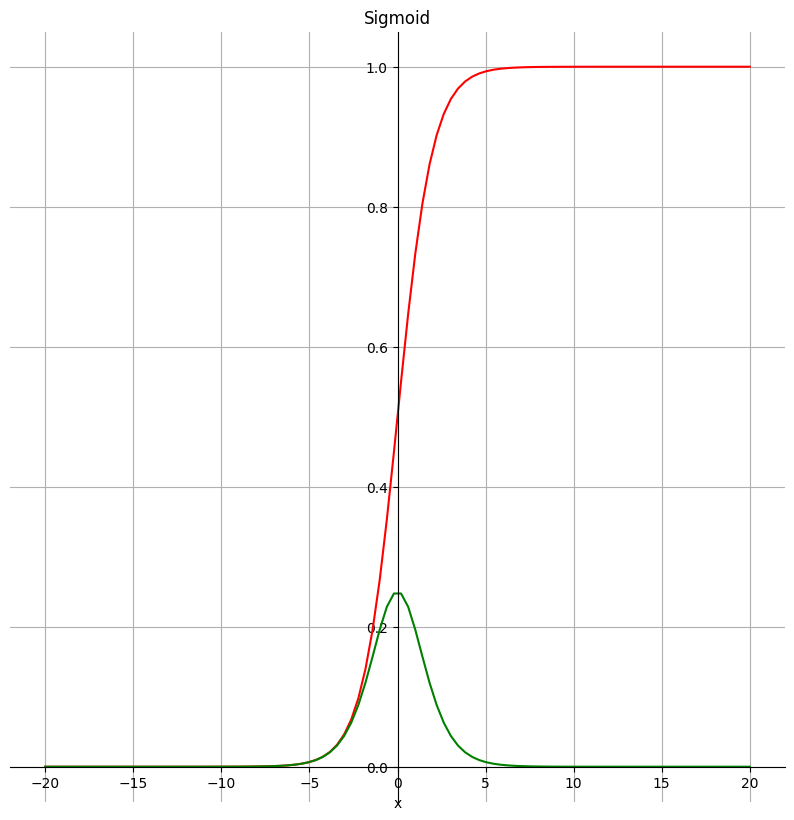

In [ ]:
function_plot(data, sigmoid(data), sigmoid_derivative(data), 'Sigmoid')

Qua hình trên ta thấy, sigmoid có nhược điểm là đạo hàm của nó bằng 0 khi các giá trị đầu vào tăng lên, dẫn tới quá trình lan truyền ngược không thay đổi được đáng kể hàm loss và mô hình không học được gì.

In [ ]:
from torch.nn import Sigmoid

torch.manual_seed(42)

data = torch.randint(1, 20, (20, ))
print(data)

sigmoid_torch = Sigmoid()
data = sigmoid_torch(data)

print(data)

tensor([16, 14, 12, 15,  3, 15, 16,  7,  6, 14,  3, 16,  4,  4, 18,  8, 11,  9,
        18, 18])
tensor([1.0000, 1.0000, 1.0000, 1.0000, 0.9526, 1.0000, 1.0000, 0.9991, 0.9975,
        1.0000, 0.9526, 1.0000, 0.9820, 0.9820, 1.0000, 0.9997, 1.0000, 0.9999,
        1.0000, 1.0000])


## ReLU

- $ ReLU(x) = max(0, x) = \begin{cases}
x, \text{if x > 0} \\
0, \text{if x <= 0}
\end{cases}$
- $ ReLU'(x) = \begin{cases}
1, \text{if x > 0} \\
0, \text{if x <= 0}
\end{cases} $

In [ ]:
def ReLU(data):
  return np.maximum(data, 0)

In [ ]:
def ReLU_derivative(data):
  return np.greater(data, 0).astype(int)

In [ ]:
data = np.arange(-20, 20, 5)
data_reLU = ReLU(data)
print(data, '\n', data_reLU)

[-20 -15 -10  -5   0   5  10  15] 
 [ 0  0  0  0  0  5 10 15]


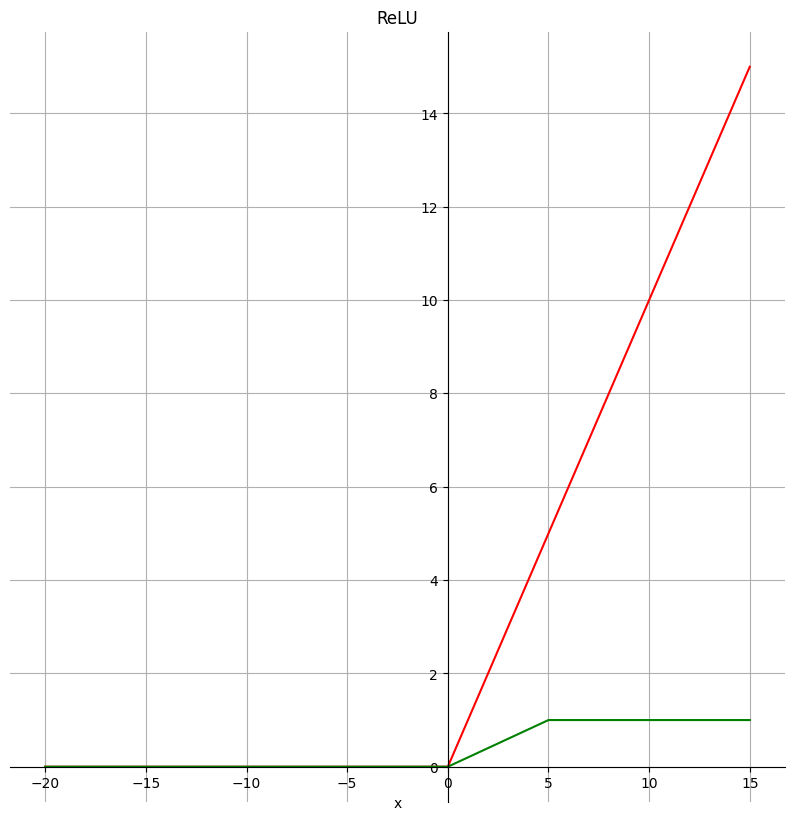

In [ ]:
function_plot(data, data_reLU, ReLU_derivative(data), 'ReLU')

In [ ]:
from torch.nn import ReLU

torch.manual_seed(42)

data = torch.randint(-20, 20, (20, ))
print(data)

ReLU_torch = ReLU()
data = ReLU_torch(data)

print(data)

tensor([  2,   7,  16,  -6,   6,  -5,   0, -16,  10,  13,  -2,  -6, -10,  14,
         11,  -8,  15,  -5, -13,   6])
tensor([ 2,  7, 16,  0,  6,  0,  0,  0, 10, 13,  0,  0,  0, 14, 11,  0, 15,  0,
         0,  6])


## Leaky ReLU

- $ ReLU(x) = \begin{cases}
x, \text{if x > 0} \\
0.01x, \text{if x <= 0}
\end{cases}$
- $ ReLU'(x) = \begin{cases}
1, \text{if x > 0} \\
0.01, \text{if x <= 0}
\end{cases} $
- Có thể thay 0.01 bằng những số dương < 1 để tránh phần âm của trục x bằng 0, tránh hiện tượng **Dying ReLU**

In [ ]:
def LeakyReLU(data):
  return np.array([0.01 * i if i < 0 else i for i in data])

In [ ]:
def LeakyReLU_derivative(data):
  return np.array([0.01 if i < 0 else 1 for i in data])

In [ ]:
data = np.linspace(-100, 100)
data_leaky_relu = LeakyReLU(data)
print(data, '\n', data_leaky_relu)

[-100.          -95.91836735  -91.83673469  -87.75510204  -83.67346939
  -79.59183673  -75.51020408  -71.42857143  -67.34693878  -63.26530612
  -59.18367347  -55.10204082  -51.02040816  -46.93877551  -42.85714286
  -38.7755102   -34.69387755  -30.6122449   -26.53061224  -22.44897959
  -18.36734694  -14.28571429  -10.20408163   -6.12244898   -2.04081633
    2.04081633    6.12244898   10.20408163   14.28571429   18.36734694
   22.44897959   26.53061224   30.6122449    34.69387755   38.7755102
   42.85714286   46.93877551   51.02040816   55.10204082   59.18367347
   63.26530612   67.34693878   71.42857143   75.51020408   79.59183673
   83.67346939   87.75510204   91.83673469   95.91836735  100.        ] 
 [-1.00000000e+00 -9.59183673e-01 -9.18367347e-01 -8.77551020e-01
 -8.36734694e-01 -7.95918367e-01 -7.55102041e-01 -7.14285714e-01
 -6.73469388e-01 -6.32653061e-01 -5.91836735e-01 -5.51020408e-01
 -5.10204082e-01 -4.69387755e-01 -4.28571429e-01 -3.87755102e-01
 -3.46938776e-01 -3.06122449

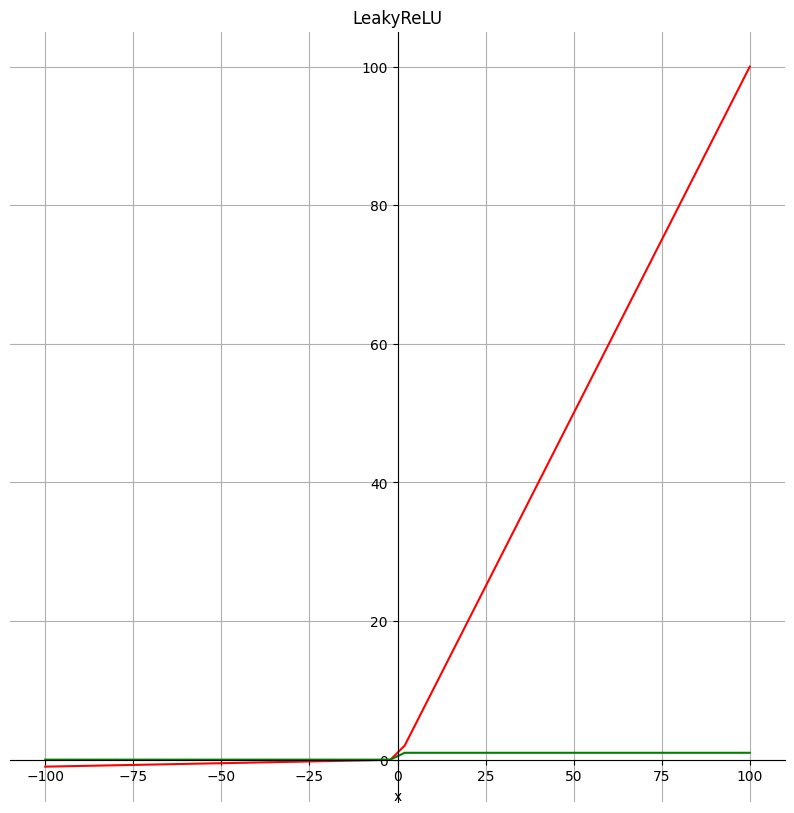

In [ ]:
function_plot(data, data_leaky_relu, LeakyReLU_derivative(data), 'LeakyReLU')

In [ ]:
from torch import nn

torch.manual_seed(42)

data = torch.randint(-20, 20, (20, ))
print(data)

data_leaky_relu_torch = nn.LeakyReLU()(data.float()) ## Input of LeakyReLU must be a float tensor

print(data_leaky_relu_torch)

tensor([  2,   7,  16,  -6,   6,  -5,   0, -16,  10,  13,  -2,  -6, -10,  14,
         11,  -8,  15,  -5, -13,   6])
tensor([ 2.0000,  7.0000, 16.0000, -0.0600,  6.0000, -0.0500,  0.0000, -0.1600,
        10.0000, 13.0000, -0.0200, -0.0600, -0.1000, 14.0000, 11.0000, -0.0800,
        15.0000, -0.0500, -0.1300,  6.0000])


## Tanh

* $ Tanh(x) = \frac{e^{x} - e^{-x}}{e^{x} + e^{-x}} $
* $ Tanh'(x) = 1 - Tanh(x) ^ 2 $
* Miền giá trị $[-1;1]$


In [ ]:
def Tanh(data):
  return np.tanh(data)

In [ ]:
def Tanh_derivative(data):
  return 1 - np.tanh(data)**2

In [ ]:
data = np.linspace(-10, 10)
data_tanh = Tanh(data)
print(data, '\n', data_tanh)

[-10.          -9.59183673  -9.18367347  -8.7755102   -8.36734694
  -7.95918367  -7.55102041  -7.14285714  -6.73469388  -6.32653061
  -5.91836735  -5.51020408  -5.10204082  -4.69387755  -4.28571429
  -3.87755102  -3.46938776  -3.06122449  -2.65306122  -2.24489796
  -1.83673469  -1.42857143  -1.02040816  -0.6122449   -0.20408163
   0.20408163   0.6122449    1.02040816   1.42857143   1.83673469
   2.24489796   2.65306122   3.06122449   3.46938776   3.87755102
   4.28571429   4.69387755   5.10204082   5.51020408   5.91836735
   6.32653061   6.73469388   7.14285714   7.55102041   7.95918367
   8.36734694   8.7755102    9.18367347   9.59183673  10.        ] 
 [-1.         -0.99999999 -0.99999998 -0.99999995 -0.99999989 -0.99999976
 -0.99999945 -0.99999875 -0.99999717 -0.9999936  -0.99998553 -0.99996727
 -0.99992596 -0.99983253 -0.99962119 -0.99914327 -0.99806297 -0.99562344
 -0.99012673 -0.97780324 -0.95048074 -0.89137347 -0.77003273 -0.54570541
 -0.20129477  0.20129477  0.54570541  0.77003

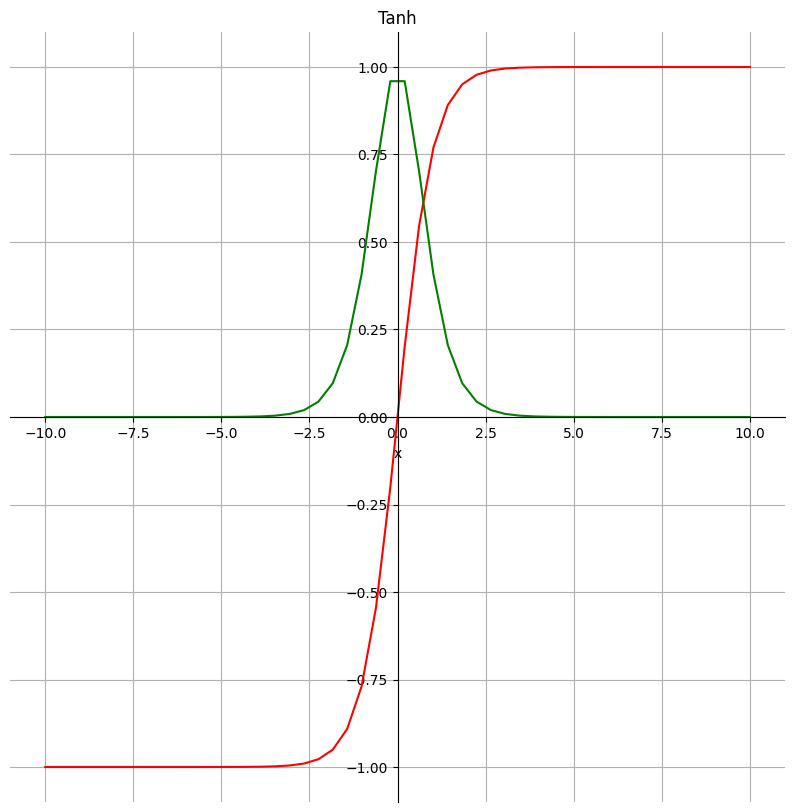

In [ ]:
function_plot(data, data_tanh, Tanh_derivative(data), 'Tanh')

In [ ]:
from torch import nn

torch.manual_seed(42)

data = torch.randint(-10, 10, (20, ))
print(data)

data_tanh_torch = nn.Tanh()(data)
print(data_tanh_torch)

tensor([ -8,  -3,   6,   4,  -4,   5, -10,  -6,   0,   3,   8,   4,   0,   4,
          1,   2,   5,   5,  -3,  -4])
tensor([-1.0000, -0.9951,  1.0000,  0.9993, -0.9993,  0.9999, -1.0000, -1.0000,
         0.0000,  0.9951,  1.0000,  0.9993,  0.0000,  0.9993,  0.7616,  0.9640,
         0.9999,  0.9999, -0.9951, -0.9993])


## Softmax

In [ ]:
def Softmax(data):
  return np.exp(data) / np.exp(data).sum()

In [ ]:
data = np.arange(-20, 20, 5)
print(Softmax(data))
print(sum(Softmax(data)))

from scipy.special import softmax
print(softmax(data))

[6.26263322e-16 9.29457180e-14 1.37943676e-11 2.04726568e-09
 3.03841167e-07 4.50940274e-05 6.69254707e-03 9.93262053e-01]
0.9999999999999999
[6.26263322e-16 9.29457180e-14 1.37943676e-11 2.04726568e-09
 3.03841167e-07 4.50940274e-05 6.69254707e-03 9.93262053e-01]


# [Cross Entropy Loss](https://tonydeep.github.io/tensorflow/2017/07/07/Cross-Entropy-Loss.html:)

# Experiment

## Data Preparation

In [ ]:
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

In [ ]:
train_dataset = datasets.MNIST(
    root='data/',
    train=True,
    transform=transforms.ToTensor(),
    download=True
)
test_dataset = datasets.MNIST(
    root='data/',
    train=False,
    transform=transforms.ToTensor(),
    download=True
)

In [ ]:
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

In [ ]:
# for data, target in train_loader:
#   print(data, ' ', target)
print(len(train_loader.dataset))

60000


## Model

In [ ]:
import torch.nn as nn
import torch

class NeuralNetwork(nn.Module):
  def __init__(self, input_size, hidden_size, output_size, activation_function):
    super().__init__()
    self.layer_1 = nn.Linear(input_size, hidden_size)
    self.layer_2 = nn.Linear(hidden_size, hidden_size)
    self.layer_3 = nn.Linear(hidden_size, output_size)
    self.activation_function = activation_function
  def forward(self, x):
    x = self.activation_function(self.layer_1(x))
    x = self.activation_function(self.layer_2(x))
    x = self.layer_3(x)
    return x

In [ ]:
def train(model, train_loader, criterion, optimizer, device):
  model.train()
  train_loss = 0.0

  for data, target in train_loader:
    data, target = data.to(device), target.to(device)
    data = data.view(data.shape[0], -1)
    optimizer.zero_grad()
    predict = model(data)
    loss = criterion(predict, target)
    loss.backward()
    optimizer.step()

    train_loss += loss.item() * data.size(0)
  return train_loss / len(train_loader.dataset)

In [ ]:
def test(model, test_loader, criterion, device):
  model.eval()
  test_loss = 0.0
  correct = 0
  total = 0

  with torch.no_grad():
    for data, target in test_loader:
      data, target = data.to(device), target.to(device)
      data = data.view(data.shape[0], -1)

      output = model(data)
      loss = criterion(output, target)
      test_loss += loss.item() * data.size(0)
      _, predict = torch.max(output.data, 1)
      total += target.size(0)
      correct += (predict == target).sum().item()
  return test_loss / len(test_loader.dataset), correct * 100 / total

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
input_size = 28 * 28
hidden_size = 128
output_size = 10
epochs = 20
learning_rate = 0.001

activation_functions = {
    'Sigmoid': nn.Sigmoid(),
    'ReLU': nn.ReLU(),
    'Tanh': nn.Tanh(),
    'LeakyReLU': nn.LeakyReLU()
}

results = {}

for name, activation in activation_functions.items():
  print('Activation function: {}'.format(name))

  model = NeuralNetwork(input_size, hidden_size, output_size, activation).to(device)
  criterion = nn.CrossEntropyLoss()
  optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

  train_loss_list = []
  test_loss_list = []
  test_accuracy_list = []

  for epoch in range(epochs):
    train_loss = train(model, train_loader, criterion, optimizer, device)
    test_loss, test_accuracy = test(model, test_loader, criterion, device)
    train_loss_list.append(train_loss)
    test_loss_list.append(test_loss)
    test_accuracy_list.append(test_accuracy)
    print(f'Epoch {epoch}/{epochs}: Train loss:{train_loss:.4f}, Test_loss:{test_loss:.4f}, Test_accuracy:{test_accuracy:.3f}')

  results[name] = {
      'train_loss': train_loss_list,
      'test_loss': test_loss_list,
      'test_accuracy': test_accuracy_list,
  }

Activation function: Sigmoid
Epoch 0/20: Train loss:0.6015, Test_loss:0.2377, Test_accuracy:93.070
Epoch 1/20: Train loss:0.2014, Test_loss:0.1778, Test_accuracy:94.750
Epoch 2/20: Train loss:0.1468, Test_loss:0.1349, Test_accuracy:95.880
Epoch 3/20: Train loss:0.1126, Test_loss:0.1158, Test_accuracy:96.380
Epoch 4/20: Train loss:0.0900, Test_loss:0.1018, Test_accuracy:96.910
Epoch 5/20: Train loss:0.0732, Test_loss:0.0932, Test_accuracy:97.330
Epoch 6/20: Train loss:0.0608, Test_loss:0.0843, Test_accuracy:97.390
Epoch 7/20: Train loss:0.0499, Test_loss:0.0816, Test_accuracy:97.570
Epoch 8/20: Train loss:0.0410, Test_loss:0.0771, Test_accuracy:97.680
Epoch 9/20: Train loss:0.0337, Test_loss:0.0904, Test_accuracy:97.250
Epoch 10/20: Train loss:0.0277, Test_loss:0.0829, Test_accuracy:97.540
Epoch 11/20: Train loss:0.0225, Test_loss:0.0798, Test_accuracy:97.700
Epoch 12/20: Train loss:0.0180, Test_loss:0.0902, Test_accuracy:97.470
Epoch 13/20: Train loss:0.0147, Test_loss:0.0926, Test_acc

In [ ]:
def plot_train_test(results, loss, type_of_plot):
  plt.figure()
  for name, data in results.items():
    plt.plot(data[loss], label=name)
  plt.xlabel('Epoch')
  plt.ylabel(type_of_plot)
  plt.legend()
  plt.show()

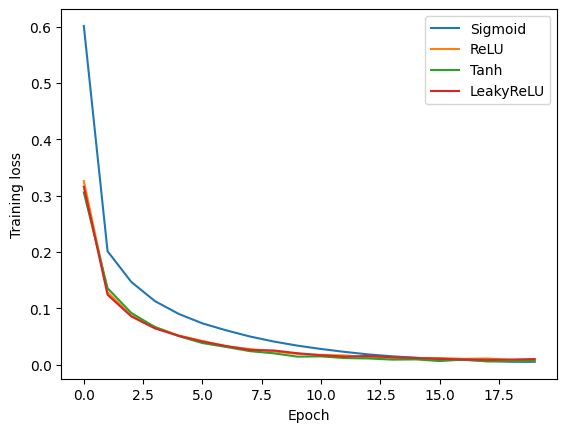

In [ ]:
plot_train_test(results, 'train_loss', 'Training loss')

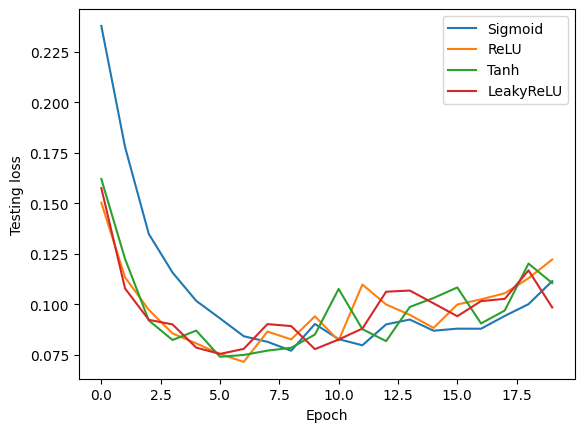

In [ ]:
plot_train_test(results, 'test_loss', 'Testing loss')

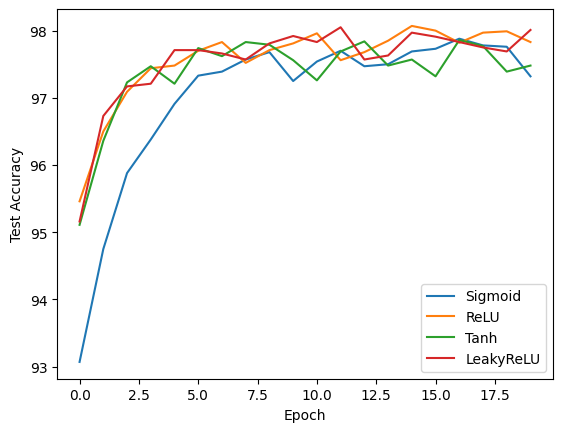

In [ ]:
plot_train_test(results, 'test_accuracy', 'Test Accuracy')